## Lab Assignment - 2.2
### Ayush Rawat
### E22CSEU0655

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#  Read the dataset (use read_csv() from pandas ) into some variable. 
df = pd.read_csv("Datasets/headbrain.csv")
df

# Take the last two columns (Head Size(cm3) and Brain Weight(grams)) into XY
xy = df[['Head Size(cm^3)', 'Brain Weight(grams)']]
xy

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590
...,...,...
232,3214,1110
233,3394,1215
234,3233,1104
235,3352,1170


In [3]:
#  Print the different statistical values of data contained in XY using describe () function from pandas
xy.describe()

,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000
mean,3633.991561,1282.873418
std,365.261422,120.340446
min,2720.000000,955.000000
25%,3389.000000,1207.000000
50%,3614.000000,1280.000000
75%,3876.000000,1350.000000
max,4747.000000,1635.000000


In [4]:
# Divide XY into X consisting of Head Size (cm3) and Y consisting of Brain Weight(grams). 
x = xy['Head Size(cm^3)']
y = xy['Brain Weight(grams)']

# Print the shape of both.
print("Shape of X:",x.shape)
print("Shape of Y:",y.shape)

Shape of X: (237,)
Shape of Y: (237,)


In [5]:
# Calculate the mean of X and Y.
mean_x = np.mean(x)
mean_y = np.mean(y)
print("Mean of X:", mean_x)
print("Mean of Y:", mean_y)

Mean of X: 3633.9915611814345
Mean of Y: 1282.873417721519


In [6]:
# Create a function to calculate coefficients
def calculate_coefficients(x, y):
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sum((x - mean_x) ** 2)
    m = numerator / denominator
    c = mean_y - (m * mean_x)
    return m, c

In [7]:
# Calculate m and c
m, c = calculate_coefficients(x, y)
print("Slope (m):", m)
print("Intercept (c):", c)

Slope (m): 0.2634293394893993
Intercept (c): 325.5734210494428


In [8]:
# Write code to find the Regression line Y= c + m*X
y_predicted = m*x + c
y_predicted

0      1514.166601
1      1310.272292
2      1448.045837
3      1320.546036
4      1425.917772
          ...     
232    1172.235318
233    1219.652599
234    1177.240476
235    1208.588567
236    1218.862311
Name: Head Size(cm^3), Length: 237, dtype: float64

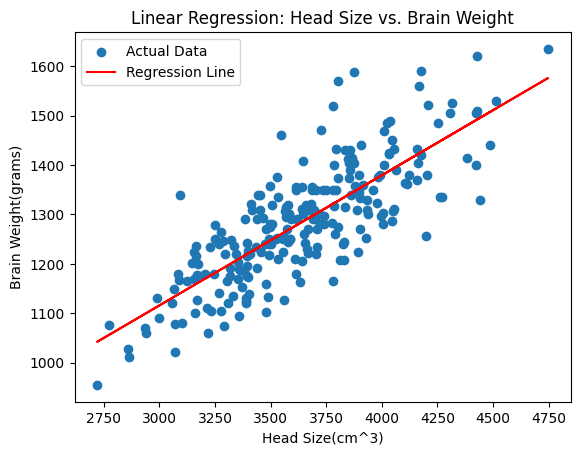

In [9]:
#  Display the regression line with Scatter plot (Head Size(cm3) in X-axis and Brain Weight (grams) in Y-axis).
plt.scatter(x, y, label="Actual Data")
plt.plot(x, y_predicted, color='red', label="Regression Line")
plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")
plt.title("Linear Regression: Head Size vs. Brain Weight")
plt.legend()
plt.show()

In [10]:
# Write code to calculate the Root Mean Square Error (RMSE).
def calculate_rmse(y_true, y_pred):
    squared_errors = (y_true - y_pred) ** 2
    mse = np.mean(squared_errors)
    rmse = np.sqrt(mse)
    return rmse

rmse = calculate_rmse(y, y_predicted)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 72.1206213783709


In [11]:
# Calculate the amount of the variation in the output dependent attribute which is predictable from the input independent variable using R2 score.
def calculate_r2(y_true, y_pred):
    total_variance = np.var(y_true)
    explained_variance = np.var(y_true - y_pred)
    r2 = 1 - (explained_variance / total_variance)
    return r2

r2_score = calculate_r2(y, y_predicted)
print("R-squared score:", r2_score)

R-squared score: 0.639311719957
